In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score, recall_score,f1_score,roc_auc_score,roc_curve
import warnings
warnings.filterwarnings('ignore')

In [40]:

print("Step 1: Load the data and understand the data structure")
#Read the data set 
df_Titanic_train = pd.read_csv("Titanic_train.csv")
df_Titanic_test = pd.read_csv("Titanic_test.csv")

print("\nStep 2: Check the data types and column details")
df_Titanic_train.info()

print("\nOriginal Data")
print(df_Titanic_train.describe())
print(df_Titanic_train.dtypes)



Step 1: Load the data and understand the data structure

Step 2: Check the data types and column details
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Original Data
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000

In [41]:
print("\nData Cleaning")
has_nan = df_Titanic_train.isna().any().any() #Returns True if any NAN values are present
print("Does the DataFrame have any NaN Values?",has_nan)

count = df_Titanic_train.isnull().sum()
print("\nBelow are the count of missing values according to the columns:")
print(count)

duplicates = df_Titanic_train.duplicated()
print("\nCount of duplicate rows")
print(duplicates.sum())





Data Cleaning
Does the DataFrame have any NaN Values? True

Below are the count of missing values according to the columns:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Count of duplicate rows
0


In [42]:
#Identify numerical columns in the dataset
numeric_col = df_Titanic_train.select_dtypes(include=['int64','float64']).columns
categ_col = df_Titanic_train.select_dtypes(include=['object','category']).columns
numeric_col_str = str(numeric_col)
categ_col_str = str(categ_col)

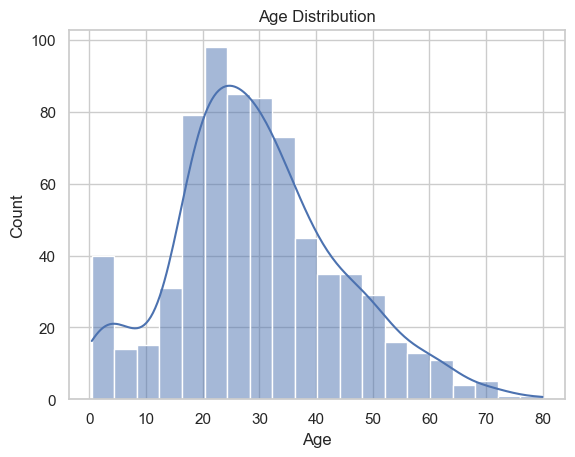

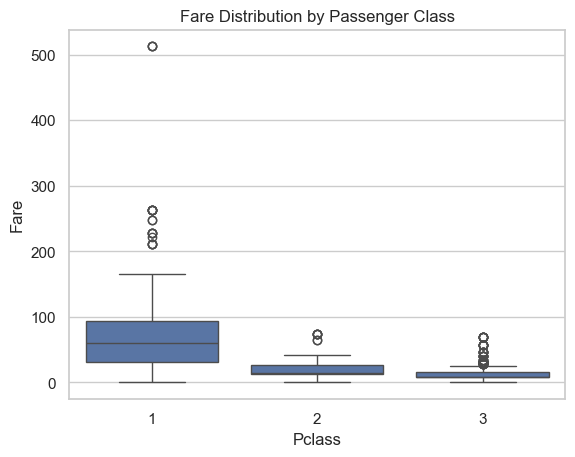

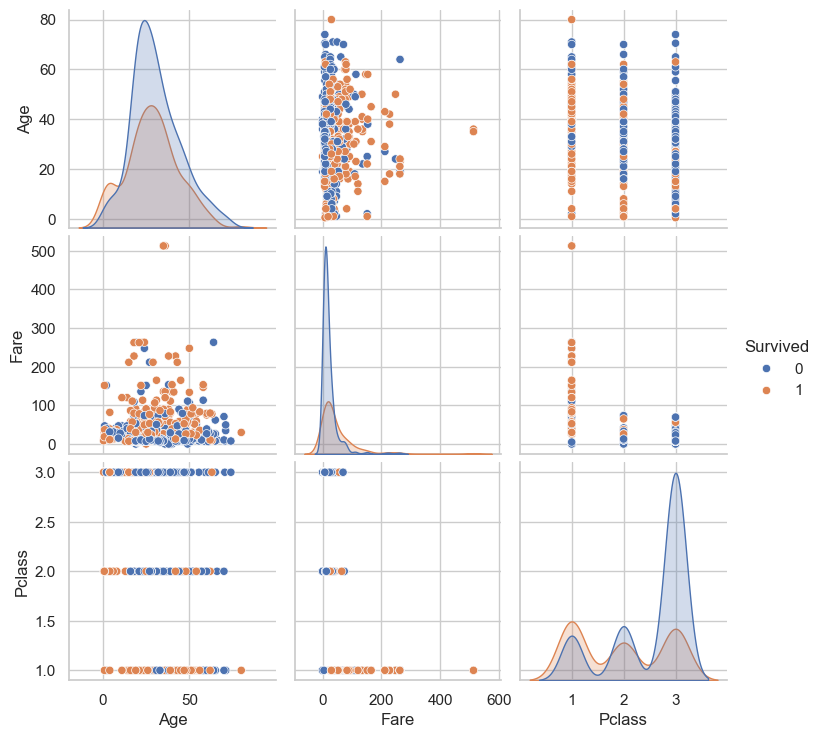

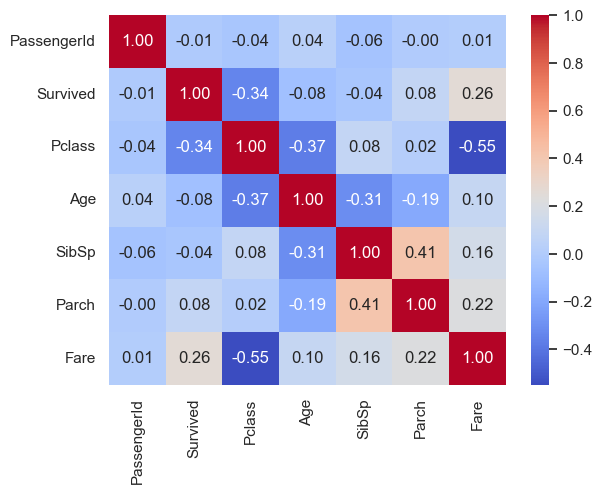

In [43]:
#Set the style for plots
sns.set(style='whitegrid')

#Histogram for Age
sns.histplot(data=df_Titanic_train, x='Age',kde=True)
plt.title('Age Distribution')
plt.show()

#Box plot for fare by passenger Class
sns.boxplot(x='Pclass',y='Fare',data=df_Titanic_train)
plt.title("Fare Distribution by Passenger Class")
plt.show()

#Pair plot for selected features
selected_features = ['Age','Fare','Pclass','Survived']
sns.pairplot(df_Titanic_train[selected_features],hue='Survived')
plt.show()

#Correlation heatmap
corr_matrix = df_Titanic_train[numeric_col].corr()
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt='.2f')
plt.show()


In [44]:


#fill missing values for 'Age' with median
df_Titanic_train['Age'].fillna(df_Titanic_train['Age'].median(),inplace=True)

#FILL MISSING 'EMBARKED WITH THE MOST FREQUEST VALUES
df_Titanic_train['Embarked'].fillna(df_Titanic_train['Embarked'].mode()[0],inplace=True)

#Drop rows where 'cabin' might have missing values (if necessary)
df_Titanic_train.drop(columns=['Cabin'],inplace=True) # Dropping Cabin column due to many missing values

#drop 'Name' as its not require for model building
df_Titanic_train.drop(columns=['Name'],inplace=True)

#drop 'Ticket as its not required for model building
df_Titanic_train.drop(columns=['Ticket'],inplace=True)

#Drop 'PassengerId' ás its not required for model building
df_Titanic_train.drop(columns=['PassengerId'],inplace=True)

df_Titanic_train.columns = df_Titanic_train.columns.str.strip()

#One hot encoding for Embarked
df_Titanic_train = pd.get_dummies(df_Titanic_train,columns=['Embarked'],drop_first=True)

#Label encoding for'Sex'
df_Titanic_train['Sex'] = df_Titanic_train['Sex'].map({'male':0,'female':1})

#One hot encoding for Embarked and Sex
#df_Titanic_train = pd.get_dummies(df_Titanic_train)
#df_Titanic_test = pd.get_dummies(df_Titanic_test)


In [45]:
df_Titanic_train.columns = df_Titanic_train.columns.str.strip()
df_Titanic_train = df_Titanic_train.loc[:, ~df_Titanic_train.columns.duplicated()]

In [46]:
df_Titanic_train.dtypes

Survived        int64
Pclass          int64
Sex             int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Embarked_Q       bool
Embarked_S       bool
dtype: object

In [47]:
df_Titanic_train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')


 Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

Accuracy: 0.81
Precision: 0.79
Recall: 0.73
F1-Score: 0.76

ROC-AUC Score: 0.88


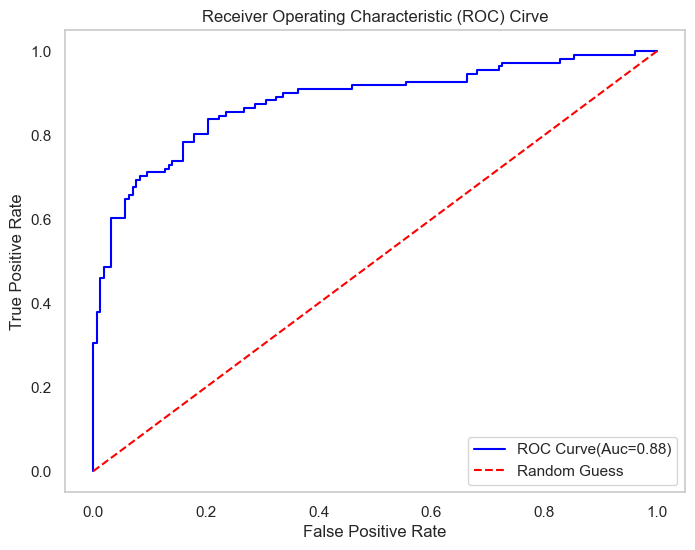

      Feature  Coefficient  Absolute_Coefficient
1         Sex     2.470249              2.470249
0      Pclass    -0.907612              0.907612
7  Embarked_S    -0.516638              0.516638
3       SibSp    -0.266876              0.266876
6  Embarked_Q    -0.108583              0.108583
4       Parch    -0.082487              0.082487
2         Age    -0.032862              0.032862
5        Fare     0.002815              0.002815


In [48]:
#Model :Logistics regression model

#Feature selection

print("\n",df_Titanic_train.columns)
X = df_Titanic_train.drop('Survived',axis=1)

#Target variable
y = df_Titanic_train['Survived']

#X = pd.get_dummies(X)



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#Initialize the model
logreg = LogisticRegression(max_iter=1000) #Increase max_iter if needed to ensure convergence
logreg.fit(X_train,y_train)

#Make prediction on the test set
y_pred = logreg.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test,y_pred)

#Precision
precision = precision_score(y_test,y_pred)

#Recall
recall = recall_score(y_test,y_pred)

#F1 score
f1 = f1_score(y_test,y_pred)

#Print metric
print(f"\nAccuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")

#Get probability for positive class (1)
y_prob = logreg.predict_proba(X_test)[:,1]

#Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test,y_prob)
print(f"\nROC-AUC Score: {roc_auc:.2f}")

#Calculate the ROC curve
fpr,tpr,thresholds = roc_curve(y_test,y_prob)

#Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr, color='blue',label=f'ROC Curve(Auc={roc_auc:.2f})')
plt.plot([0,1],[0,1],color='red',linestyle='--',label='Random Guess')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Cirve")
plt.legend(loc='lower right')
plt.grid()
plt.show()

#Extract coefficients
coefficients = pd.DataFrame({'Feature':X.columns,'Coefficient':logreg.coef_[0]})

#Sort by absolute value for significance
coefficients['Absolute_Coefficient']=coefficients['Coefficient'].abs()
coefficients = coefficients.sort_values(by='Absolute_Coefficient',ascending=False)
print(coefficients)

In [49]:
import pickle as pickle

#Load the train model (update 'logistic regression.pkl' with your model filename)
with open("logistic_model.pkl","wb") as file:
    pickle.dump(logreg,file)